# **Credit Card Fraud Detection**

##### **Context**
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for  bank. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.



![Credit Card Fraud Detection](../data/credit_card.jpg)




### **1. Importing Liabraries**

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **2. Loading Datasets**

In [68]:
Test_data=pd.read_csv("../data/fraudTest.csv",index_col=None)
Test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [69]:
Train_data=pd.read_csv("../data/fraudTrain.csv",index_col=None)
Train_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### **3. Validating Datasets**

The file is already split between **train** and **test** datasets, we will learn from the given train data and validate our learnings from the test data.

But first we validate that are both file really Train and Test files.

    1. First we will check that both datasets have same column names    
    2. We will check the % in which both files are divided.

In [70]:
all(Train_data.columns==Test_data.columns)
# Both Datasets have same column names

True

In [71]:
length_of_train_data=len(Train_data)
length_of_test_data=len(Test_data)
total_length=length_of_test_data+length_of_train_data

ratio_of_train_data=round((length_of_train_data/total_length)*100,1)
ratio_of_test_data=round((length_of_test_data/total_length)*100,1)

print("Total Length of both Datasets is ", total_length)

print("Ratio of Train dataset : " , ratio_of_train_data ,' % ')
print("Ratio of Test dataset : " ,ratio_of_test_data , ' % ')

Total Length of both Datasets is  1852394
Ratio of Train dataset :  70.0  % 
Ratio of Test dataset :  30.0  % 


### **4. Combining Datasets**

We will combine both datasets for **cleaning** and **prepration** purpose.

We will create a **label** in both datasets so that when we want to again split the datasets we should know that which one is Train data and which one is Split data


In [72]:
# Creating Train and Test labels

Train_data['label']='Train'
Test_data['label']='Test'


In [73]:
# Combining Datasets

data=pd.concat([Train_data,Test_data],axis=0)
data.shape


(1852394, 24)

In [74]:
data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,label
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,Test
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Test
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Test
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,Test
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0,Test


### **5. Data Cleaning**

##### **5.1. Exploring the Dataset**

In [75]:
# Understaing the shape of the Dataset
data.shape 
# Data has 1852394 rows and 24 columns

(1852394, 24)

In [76]:
# Checking the data types of the dataset columns
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
label                     object
dtype: object

In [77]:
# Checking is there any missing values in the dataset

data.isnull().sum()
# Great ,Fortunately we have no missing values in the dataset

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
label                    0
dtype: int64

In [78]:
# Checking is there any duplicate values in the dataset

data.duplicated().value_counts()

# we found out that there is no duplicate values in the dataset

False    1852394
dtype: int64

In [119]:
# Checking statistics of the Dataset
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


##### **5.2. TypeCasting the Columns**

We need to Type cast the columns wherever need.

In [138]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['dob']=pd.to_datetime(data['dob'])
data.dtypes


trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
label                            object
dtype: object

##### **5.3. Deleting Column**

In [79]:
data.drop('Unnamed: 0',axis=1,inplace=True) 


In [80]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,label
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Train
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Train
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Train
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Train
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Train


##### **5.4. Unique Values in the columns of the Dataset**

In [124]:
#Unique values in the whole dataset

for column_name in data.columns:
    print(column_name ,' : ',len(data[column_name].unique()))

trans_date_trans_time  :  1819551
cc_num  :  999
merchant  :  693
category  :  14
amt  :  60616
first  :  355
last  :  486
gender  :  2
street  :  999
city  :  906
state  :  51
zip  :  985
lat  :  983
long  :  983
city_pop  :  891
job  :  497
dob  :  984
trans_num  :  1852394
unix_time  :  1819583
merch_lat  :  1754157
merch_long  :  1809753
is_fraud  :  2
label  :  2


In [145]:
#Unique value of the columns having Object datatype

data_object_columns=data.select_dtypes(include = 'object').columns
data[data_object_columns].nunique().sort_values()
    

gender             2
label              2
category          14
state             51
first            355
last             486
job              497
merchant         693
city             906
street           999
trans_num    1852394
dtype: int64

### **6. Visualization and Inferences**

##### **6.1. Checking Target variable Distribution**

,count,distribution
genuine,1842743,99.478999
fraud,9651,0.521001


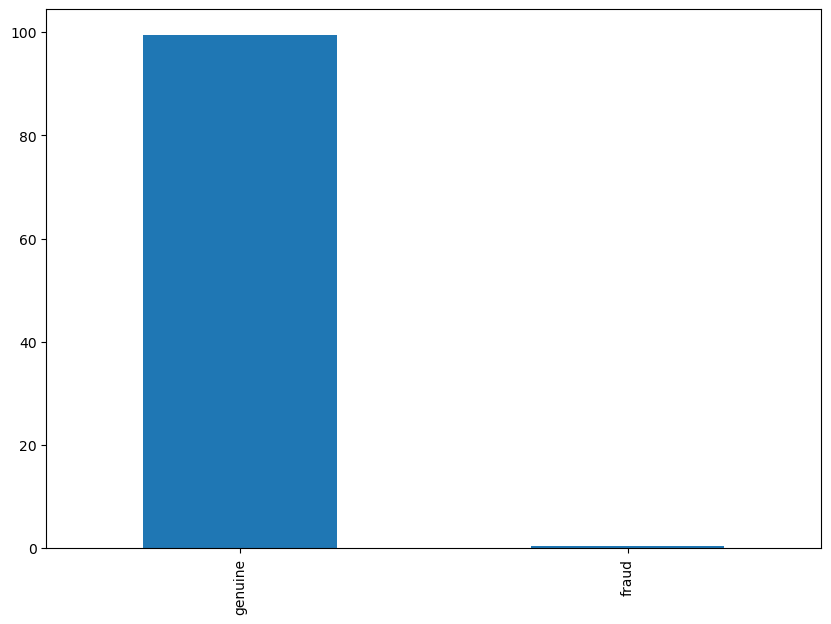

In [60]:
a = data['is_fraud'].value_counts().rename('count') # count of classes
b = (data['is_fraud'].value_counts(normalize = True)*100).rename('distribution') # normalisation of the classes
tem = pd.concat([a,b], axis = 1)
tem.index = ['genuine','fraud']
tem['distribution'].plot(kind = 'bar', figsize = [10,7]);
tem

We found out that Dataset is **highly Imbalanced** because 99.4% of data is **Genuine** and only 0.52% of data is **Fraud**

##### **6.2. Checking Target variable Distribution by Gender**

,Genuine,Fraud
F,1009850,4899
M,832893,4752


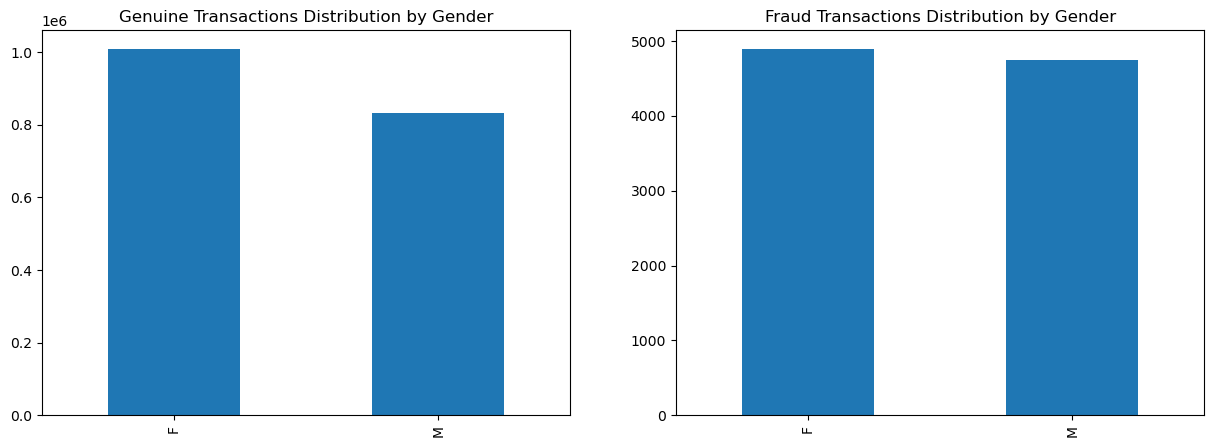

In [100]:
non_fraud=data[data['is_fraud']==0]
fraud=data[data['is_fraud']==1]


plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
non_fraud['gender'].value_counts().plot(kind='bar')
plt.title("Genuine Transactions Distribution by Gender")

plt.subplot(1,2,2)
fraud['gender'].value_counts().plot(kind='bar')
plt.title("Fraud Transactions Distribution by Gender")

temp=pd.concat([non_fraud['gender'].value_counts().rename('Genuine'),fraud['gender'].value_counts().rename('Fraud')],axis=1)
temp

We can see that Fraudulent Transactions are **equally distributed** in **Male** and **Female** .So there is no differenece because of gender

##### **6.3. Checking Target variable Distribution by State**

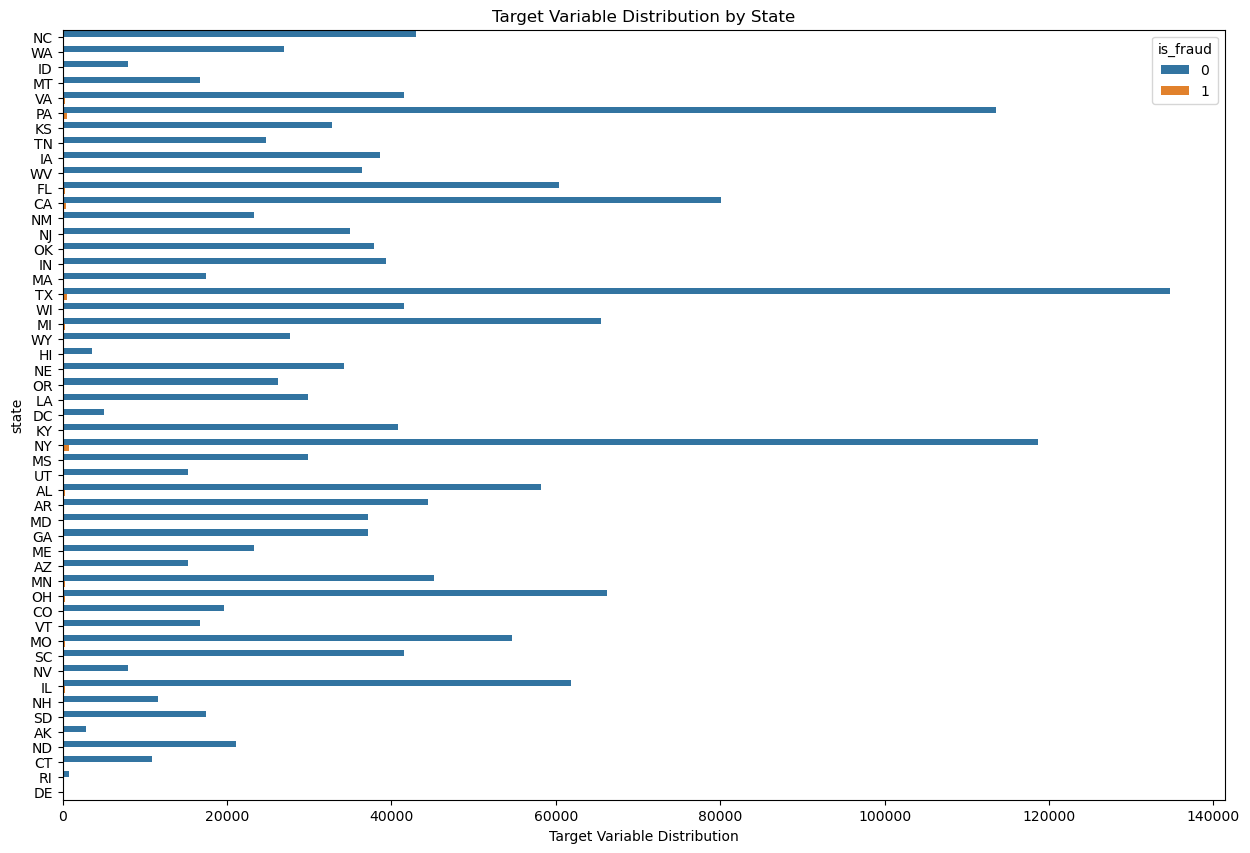

In [107]:
plt.figure(figsize=(15,10))
sns.countplot(y='state', hue='is_fraud', data=data)
plt.title("Target Variable Distribution by State")
plt.xlabel("Target Variable Distribution")
plt.show()

##### **6.4. Checking Target variable Distribution by Jobs**

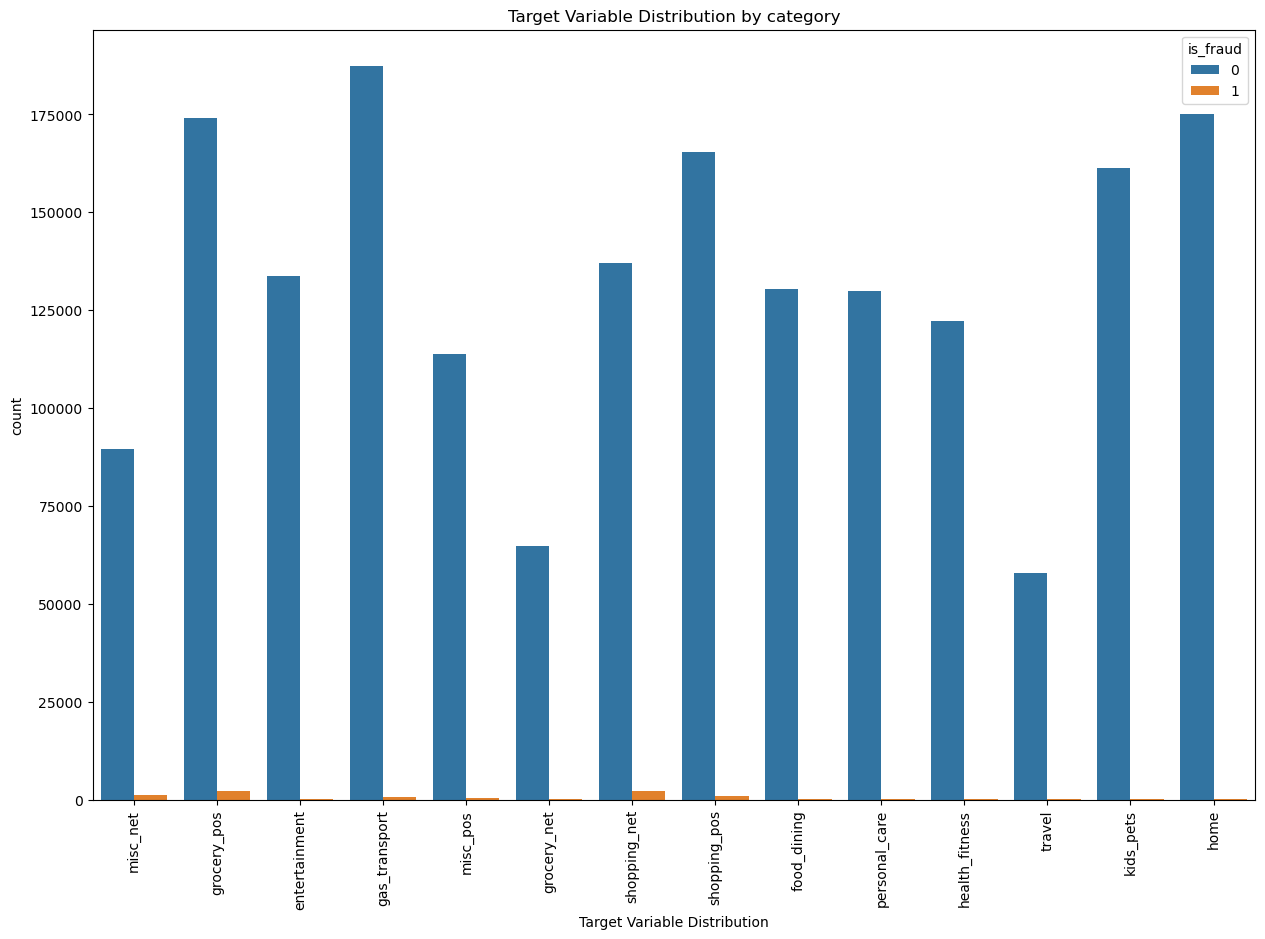

In [116]:
plt.figure(figsize=(15,10))
sns.countplot(x='category', hue='is_fraud', data=data)
plt.title("Target Variable Distribution by category")
plt.xlabel("Target Variable Distribution")
plt.xticks(rotation=90)
plt.show()

##### **6.5. Checking Target variable Distribution by Age**

<Axes: xlabel='is_fraud', ylabel='age'>

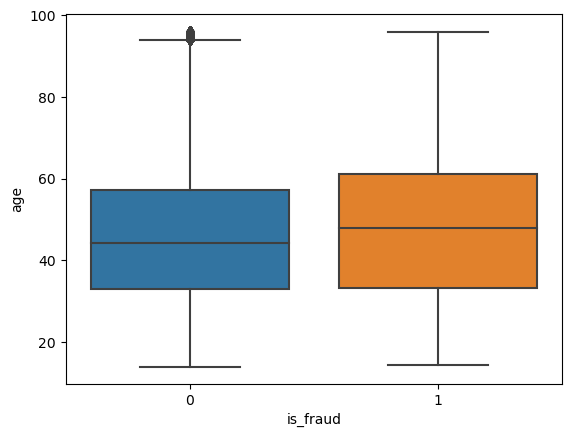

In [139]:
#We will use np.timedelta64(1,'Y') to find out difference in Years.
data['age']=(data['trans_date_trans_time']-data['dob'])/np.timedelta64(1,'Y')

sns.boxplot(y='age',x='is_fraud',data=data)

#### **6.6. Distributions Of Feature Values**

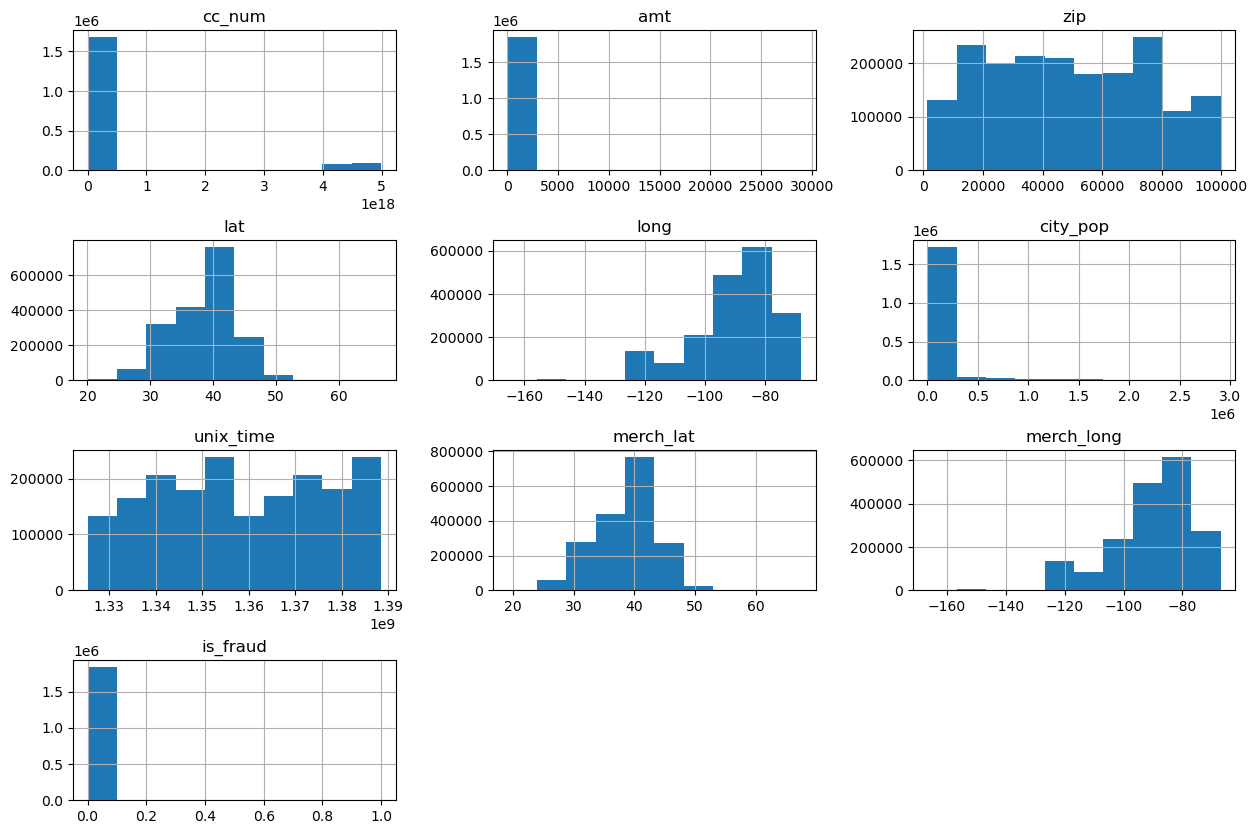

In [132]:
data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook